## Quesiton 16. Use some function for neural networks, like Stochastic Gradient Descent or backpropagation - algorithm to predict the value of a variable based on the dataset of problem 14.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Load the dataset
data = pd.read_csv('student_data.csv')

# Encode categorical variables
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data['social_skills'] = encoder.fit_transform(data['social_skills'])
data['motivation'] = encoder.fit_transform(data['motivation'])
data['communication'] = encoder.fit_transform(data['communication'])
data['teamwork'] = encoder.fit_transform(data['teamwork'])

In [3]:
# Split the dataset into train and test sets
X = data.iloc[0:,:10]
y = data['suitable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train[['age', 'academic_performance', 'extracurricular_activities', 'time_management',
         'attendance' ]] = scaler.fit_transform(X_train[['age', 'academic_performance', 
                                                         'extracurricular_activities', 'time_management',
                                                         'attendance']])
X_test[['age', 'academic_performance', 'extracurricular_activities',
        'time_management', 'attendance']] = scaler.transform(X_test[['age', 'academic_performance', 
                                                                     'extracurricular_activities', 
                                                                     'time_management', 'attendance']])

# Train the model with Stochastic Gradient Descent algorithm
sgd = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.001, max_iter=1000, random_state=42)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.001, loss='log_loss', random_state=42)

Accuracy:  0.51
Confusion Matrix: 
[[102   4]
 [ 94   0]]


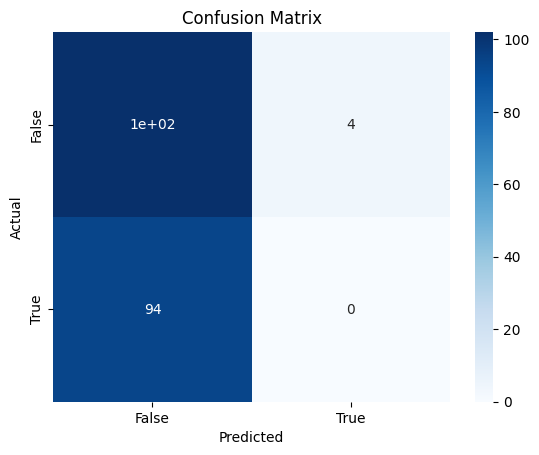

In [4]:
# Evaluate the model on test set
y_pred = sgd.predict(X_test)
accuracy = sgd.score(X_test, y_test)
print("Accuracy: ", accuracy)

# Print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(confusion)

# Plot the confusion matrix
labels = ['False', 'True']
sns.heatmap(confusion, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
